In [1]:
!pip3 install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip3 install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip3 install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip3 install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Import Module
import os
import librosa
import pandas as pd
import numpy as np
import random
random.seed(7)

In [7]:
# Folder Path
path = "/content/drive/MyDrive/Mini Project/Dataset/Audio/Abusive"

X_data = []
# Change the directory
os.chdir(path)
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".mp3"):
        file_path = f"{path}/{file}"
  
        # call read text file function
        fl = librosa.load(file_path)
        X_data.append(fl)
len(X_data)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

47

In [8]:
Y_data = [1 for i in range(len(X_data))]

# Folder Path
path = "/content/drive/MyDrive/Mini Project/Dataset/Audio/Non Abusive"

# Change the directory
os.chdir(path)
cnt = 0
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".mp3"):
        file_path = f"{path}/{file}"
        # call read text file function
        fl = librosa.load(file_path)
        X_data.append(fl)
        cnt += 1
len(X_data)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

88

In [9]:
for i in range(cnt):
  Y_data.append(0)
Y_data = np.array(Y_data)
len(Y_data)

88

In [10]:
def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128, fmax=8000).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0) 
    return mfc_coefficients

In [11]:
def get_features(file):
    # load an individual soundfile
     
    waveform , sr = librosa.load(file, sr=16000)
    sample_rate = sr
    # compute features of soundfile
    chromagram = feature_chromagram(waveform, sample_rate)
    melspectrogram = feature_melspectrogram(waveform, sample_rate)
    mfc_coefficients = feature_mfcc(waveform, sample_rate)

    feature_matrix=np.array([])
    # use np.hstack to stack our feature arrays horizontally to create a feature matrix
    feature_matrix = np.hstack((chromagram, melspectrogram, mfc_coefficients))

    return feature_matrix

In [12]:
# Folder Path
path = "/content/drive/MyDrive/Mini Project/Dataset/Audio/Abusive"

Features_Abusive = []
# Change the directory
os.chdir(path)
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".mp3"):
        file_path = f"{path}/{file}"
  
        # call read text file function
        Features_Abusive.append(get_features(file_path))
len(Features_Abusive)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

47

In [13]:
# Folder Path
path = "/content/drive/MyDrive/Mini Project/Dataset/Audio/Non Abusive"

Features_Non_Abusive = []
# Change the directory
os.chdir(path)
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".mp3"):
        file_path = f"{path}/{file}"
  
        # call read text file function
        Features_Non_Abusive.append(get_features(file_path))
len(Features_Non_Abusive)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

41

In [14]:
Features = Features_Abusive + Features_Non_Abusive
len(Features)

88

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [16]:
Features = np.array(Features)
Features_df = pd.DataFrame(Features)

In [17]:
def get_features_statistics(df):
    # Check chromagram feature values
    features_df_chromagram = df.loc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}') 

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.loc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.loc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

In [18]:
get_features_statistics(Features_df)

12 Chromagram features:           min = 0.332,     max = 0.779,     mean = 0.556,     deviation = 0.068

128 Mel Spectrogram features:     min = 0.000,     max = 315.444,     mean = 6.411,     deviation = 17.181

40 MFCC features:                 min = -444.578,    max = 153.415,    mean = -4.669,    deviation = 37.807


In [19]:
scaler = StandardScaler()
Features_scaled = scaler.fit_transform(Features)

scaler = MinMaxScaler()
Features_minmax = scaler.fit_transform(Features)

In [20]:
Features.shape

(88, 180)

In [21]:
Features_scaled.shape

(88, 180)

In [22]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
encoder = LabelEncoder()
encoder.fit(Y_data)
encoded_labels = encoder.transform(Y_data)

In [24]:
Features_df[180] = encoded_labels

In [25]:
corr = Features_df.corr()
class_correlation = list(corr[180])
feature_indexes = list(range(181))
sorted_feature_indexes = [x for _,x in sorted(zip(class_correlation, feature_indexes))]
feature_selection = sorted_feature_indexes[:10] + sorted_feature_indexes[171:]

In [26]:
temp_Features_df = Features_df[feature_selection]
temp_Features_df.shape

(88, 20)

In [27]:
corr = temp_Features_df.corr()

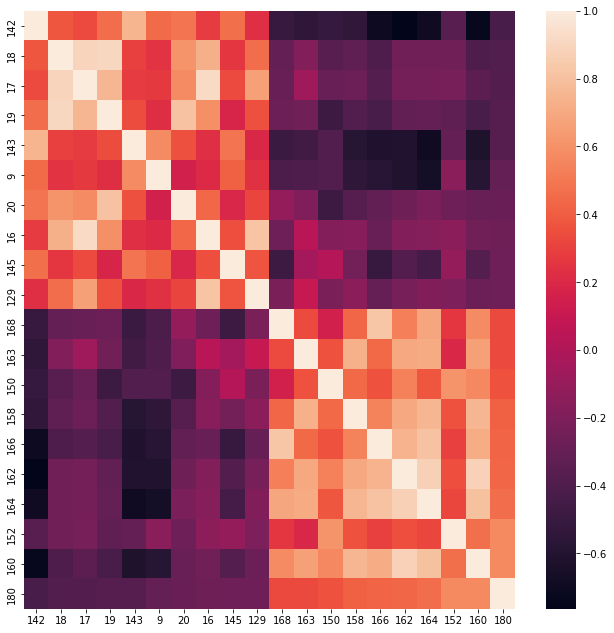

In [28]:
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           ax=ax)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(Features, encoded_labels, test_size = 0.2)

In [31]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(Features_scaled, encoded_labels, test_size = 0.2)

In [32]:
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(Features_minmax, encoded_labels, test_size = 0.2)

In [33]:
test_features = X_test
test_features_scaled = X_test_scaled
test_features_minmax = X_test_minmax
encoded_test_labels = y_test

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear'),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(),#max_depth=5, n_estimators=10, max_features=1),
    LogisticRegression()]

In [36]:
scores = []
for model in classification_models:
    model = model
    model.fit(X_train, y_train)
    score_normal = model.score(X_test, y_test)
    test_normal = model.score(test_features, encoded_test_labels)
    
    model.fit(X_train_scaled, y_train)
    score_scaled = model.score(X_test_scaled, y_test)
    test_scaled = model.score(test_features_scaled, encoded_test_labels)
    
    model.fit(X_train_minmax, y_train)
    score_minmax = model.score(X_test_minmax, y_test)
    test_minmax = model.score(test_features_minmax, encoded_test_labels)
    
    
    
    model_name = type(model).__name__
    if model_name=='SVC' and model.kernel=='rbf': model_name+=' RBF kernel'
    scores.append((model_name,(f'{100*score_normal:.2f}%'), (f'{100*score_scaled:.2f}%'), (f'{100*score_minmax:.2f}%'),
                  (f'{100*test_normal:.2f}%'), (f'{100*test_scaled:.2f}%'), (f'{100*test_minmax:.2f}%')))
# Make it pretty
scores_df = pd.DataFrame(scores,columns=['Classifier','Accuracy Normal', 'Accuracy Scaled', 'Accuracy MinMax',
                                        "Test Normal", "Test Scaled", "Test MinMax"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [37]:
scores_df

,Classifier,Accuracy Normal,Accuracy Scaled,Accuracy MinMax,Test Normal,Test Scaled,Test MinMax
0,KNeighborsClassifier,72.22%,50.00%,50.00%,72.22%,50.00%,50.00%
1,SVC,77.78%,61.11%,61.11%,77.78%,61.11%,61.11%
2,SVC RBF kernel,77.78%,44.44%,61.11%,77.78%,44.44%,61.11%
3,DecisionTreeClassifier,61.11%,27.78%,50.00%,61.11%,27.78%,50.00%
4,RandomForestClassifier,72.22%,38.89%,50.00%,72.22%,38.89%,50.00%
5,LogisticRegression,72.22%,50.00%,50.00%,72.22%,50.00%,50.00%
